
Total Sales by Category: 
 Category
Personal Care    422584.23
Dairy            285337.35
Beverages        166666.61
Grains           152085.15
Bakery           147758.50
Snacks           129519.97
Poultry          108600.97
Name: Total, dtype: float64

Total Sales by Region: 
 Region
North    390175.83
South    369631.56
East     330801.31
West     321944.08
Name: Total, dtype: float64

Total Sales by Mode of Payment: 
 Payment Mode
UPI            298472.36
Credit Card    287579.44
Net Banking    286569.22
Debit Card     272336.01
Cash           267595.75
Name: Total, dtype: float64

Top 5 Products by Sales:
 Product
Juice    166666.61
Milk     154199.62
Rice     152085.15
Soap     149388.80
Bread    147758.50
Name: Total, dtype: float64

Top 5 Customers:
 Customer
Michael    38960.71
Robert     29284.22
Daniel     24450.80
Matthew    23270.08
William    20610.70
Name: Total, dtype: float64

Monthly Sales Trend:
 Month
January      118039.57
February      95770.26
March        116313

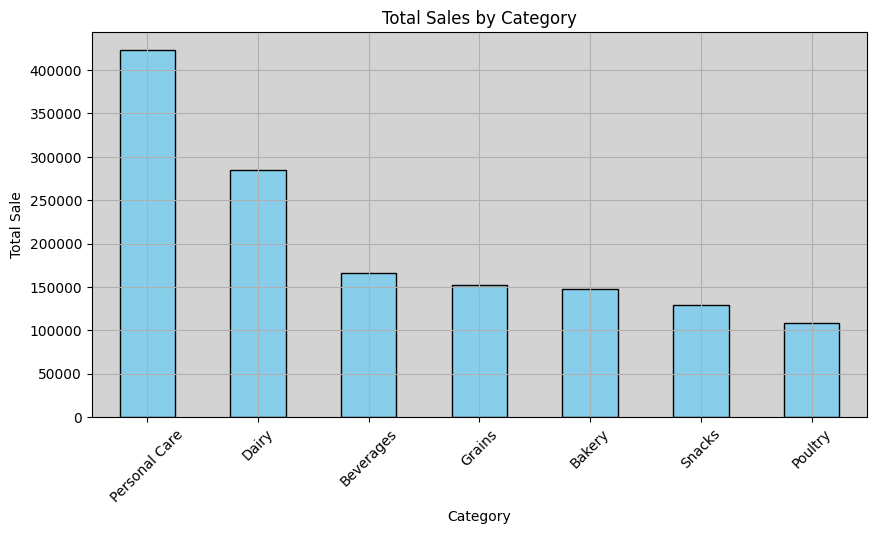

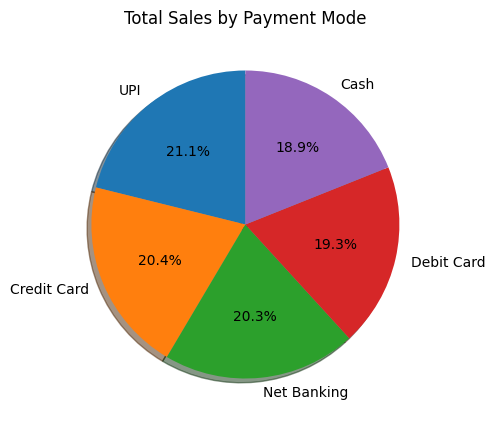

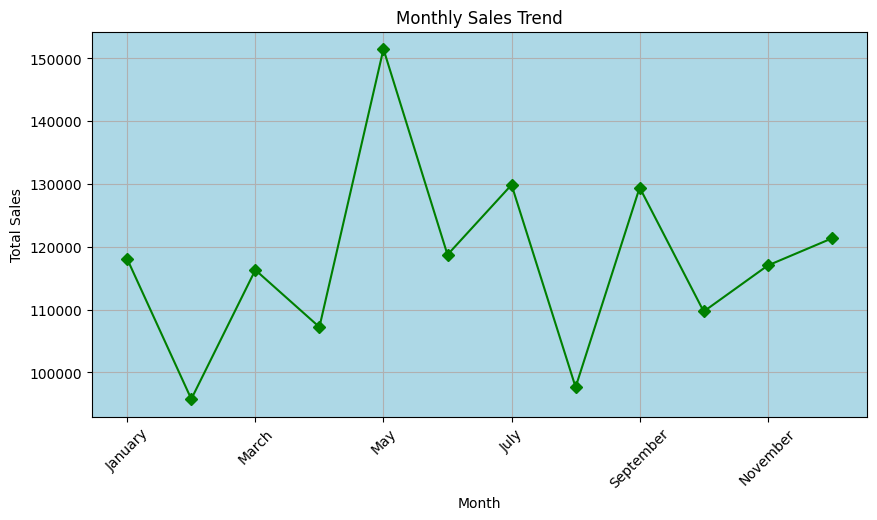

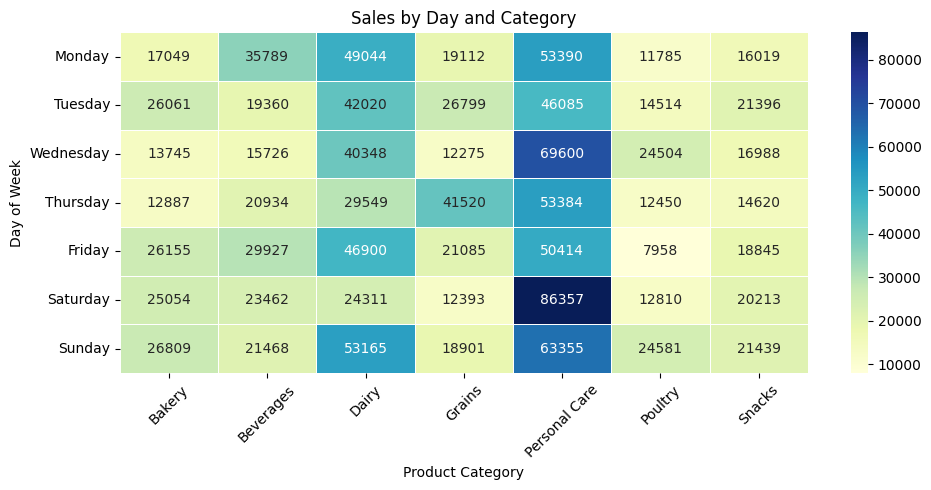

C:\Users\deepe\AppData\Local\Temp\ipykernel_11228\3625553509.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Category", y="Price", palette='Set1')


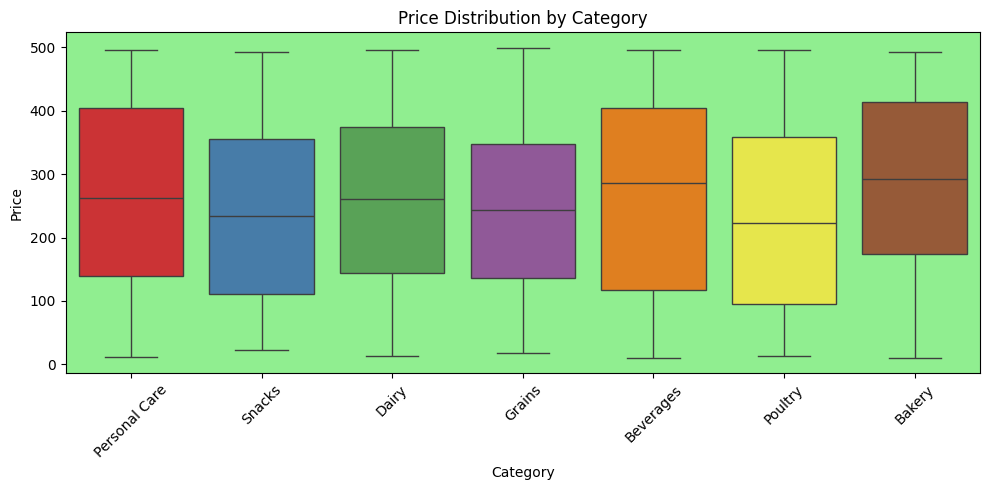

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ******DATA CLEANING******

data=pd.read_excel("sales_data_large.xlsx")
df=pd.DataFrame(data)
# print(df.head(10))
df["Date"]=pd.to_datetime(df["Date"])
df["Month"]=df["Date"].dt.month_name()
df["Day"]=df["Date"].dt.day_name()
df["Total"]=df["Price"]*df["Quantity"]
df.drop_duplicates(inplace=True)


# ******EDA (EXPLORATORY DATA ANALYSIS)******

# Sales by Category
Category_sales=df.groupby("Category")["Total"].sum().sort_values(ascending=False)
print("\nTotal Sales by Category: \n",Category_sales)
# Sales by Region
Region_sales=df.groupby("Region")["Total"].sum().sort_values(ascending=False)
print("\nTotal Sales by Region: \n", Region_sales)
# Sales by Payment Mode
Payment_mode_sales=df.groupby("Payment Mode")["Total"].sum().sort_values(ascending=False)
print("\nTotal Sales by Mode of Payment: \n", Payment_mode_sales)
# Top 5 Product With Highest sales
Top_product=df.groupby("Product")["Total"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Sales:\n",Top_product)
# Top 5 customers
Top_customers=df.groupby("Customer")["Total"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Customers:\n",Top_customers)
# Monthly Sales Trend
monthly_sales = df.groupby("Month")["Total"].sum()
monthly_sales = monthly_sales.loc[
    ['January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December']
] 
print("\nMonthly Sales Trend:\n",monthly_sales)

# Average Order
Average_order=df["Total"].mean()
print("\nAverage_order_value\n", round(Average_order,2))

# ******DATA VISUALIZATION******
# Total Sales by Category
plt.figure(figsize=(10, 5))
Category_sales.plot(kind="bar", color="skyblue", edgecolor="black")
plt.gca().set_facecolor("lightgrey")
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.ylabel("Total Sale")
plt.grid(True)
plt.savefig("Total Sales by Category.png")
plt.show()

# Total Sales by Mode of Payment
plt.figure(figsize=(10, 5))
Payment_mode_sales.plot(kind="pie", autopct="%1.1f%%", startangle=90,shadow=True)
plt.ylabel("")
plt.title("Total Sales by Payment Mode")
plt.savefig("Total sales by mode of payment.png")
plt.show()


# Monthly Sales Trend
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind="line", marker="D", color="green")
plt.gca().set_facecolor("lightblue")
plt.title("Monthly Sales Trend")
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.savefig("Monthly Sales Trend.png")
plt.show()


# Sales by Day and Category
pivot = df.pivot_table(values='Total', index='Day', columns='Category', aggfunc='sum')
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(ordered_days)
# print(pivot)
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Sales by Day and Category")
plt.ylabel("Day of Week")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Sales by Day and Category.png")
plt.show()


# Price Distribution by Category
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Category", y="Price", palette='Set1')
plt.gca().set_facecolor("lightgreen")
plt.title("Price Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Price Distribution by Category.png")
plt.show()
